# Data Analysis of UPV Dataset

## 1. Introduce environmental variables

In [167]:
# set system language to english
Sys.setenv(LANG = "en")

#import necessary libraries for the project
library(dplyr) # important 
library(tidyr) # important
library(ggplot2) # for the plots (chapter 6)
library(arules) # for some advanced working with data (chapter 6)


# prepare environmental variables for the project
WORKING_DIRECTORY <- "C:\\Users\\User\\Desktop\\Studia\\ERASMUS\\DATA_ANALYSIS\\analysisProject\\"
DATASET_PATH <- "resources\\"
COURSES <- "students_courses.csv"
ENROLMENTS <- "students_enrolment.csv"
YEARS <- "students_years.csv"
OUTPUT <- "output\\"

_______________________________




## 2. Load the datasets

The provided data has been presented in the form of csv file. What is worth noticing - there has been used a ";" separator insted of "," one. This is not the standrd CSV format - Coma Sepparated Vallues

<br>

Some documentation on the code below

    paste(ARG1, ARG 2...., sep="") - Joins string arguments (ARG1, ARG2 ect) using separateor expressed by the thing between quotes
    
    header - defines if there is a header in csv (the row with column names
    
    na.string= - defines which strings are to be marked as NA-s 
        na.string=c("") - this function tells to marked as an NA an empty string ( so something which has nothing insinde )


In [106]:
# Load courses dataset 
courses_df <-  read.csv2(paste(WORKING_DIRECTORY, DATASET_PATH, COURSES, sep='') ,header=TRUE, na.strings=c(""))
head(courses_df, 3)

NIP,TIT,ASI,CACA,GLM,CTOT,BLO,TPBLO,COND_ASI,ACTA,NOTA,CAL,TIPCRE
12428,156,11553,2014,RE1,6.0,3,B,NA,S,7.1,N,B
12428,156,11567,2014,RE1,4.5,3,G,NA,S,8.1,N,O
12428,156,11572,2014,RE1,4.5,4,G,NA,S,8.0,N,O


In [115]:
# Load enrolments dataset 
enrolments_df <- read.csv2(paste(WORKING_DIRECTORY, DATASET_PATH, ENROLMENTS, sep='') ,header=TRUE, na.strings=c(""))
head(enrolments_df, 3)

NIP,TIT,ANYCOM,ING_INGRESO,ING_NOTA,ING_CONV,ING_EST,ING_CUPO,CURSO_TITULADO,EDAD,SEXO,ESTUDIS_P,ESTUDIS_M,CRE_RECON_INI,NUMPRE
439444,156,2010,NAI,6.10,J,10,G,NA,19,V,5,5,6,8
466072,156,2010,NAP,6.02,S,10,G,NA,25,V,4,4,0,1
354734,156,2010,NAP,6.90,J,10,G,NA,22,V,5,5,0,1


In [117]:
# Load years dataset 
years_df <- read.csv2(paste(WORKING_DIRECTORY, DATASET_PATH, YEARS, sep='') ,header=TRUE, na.strings=c(""))
head(years_df, 3)

NIP,TIT,CACA,TRABAJO_A,OBTIENE_BECA,ESTADO,CRE_MAT,CRE_SUP,CRE_SUS,CRE_NP,CRE_MAT_CN,CRE_SUP_CN,CRE_SUS_CN,CRE_NP_CN
504943,158,2012,NA,-,NA,25.5,25.5,0,0,25.5,25.5,0,0
504911,158,2012,NA,-,NA,25.5,19.5,6,0,25.5,19.5,6,0
504898,158,2012,NA,-,NA,28.5,19.5,0,9,28.5,19.5,0,9


____________________________________________

## 3. Translate the headers
As the data has been privided in spanish, some translations are required in order for the avarege user to understand it. Such translations has been applied:
NT == "No Transtlation"  

### 3.1 - Students_enrolment.csv
##### Most significant - entrance number

In [123]:
colnames(enrolments_df) <- c(
    "Stud_ID",
    "Degree_ID",
    "Start_Year",
    "Enrolment_Type",
    "Admission_Grade",
    "Entry_Exam_Passed_Month",
    "Prev_Studies",
    "Entry_Type",
    "Current_Year",
    "Start_Age",
    "Sex",
    "Father_Edu_Lev",
    "Mother_Edu_Lev",
    "ECTS_Student_Initial",
    "Preference_Degree_Order")
head(enrolments_df)

Stud_ID,Degree_ID,Start_Year,Enrolment_Type,Admission_Grade,Entry_Exam_Passed_Month,Prev_Studies,Entry_Type,Current_Year,Start_Age,Sex,Father_Edu_Lev,Mother_Edu_Lev,ECTS_Student_Initial,Preference_Degree_Order
439444,156,2010,NAI,6.100,J,10,G,NA,19,V,5,5,6,8
466072,156,2010,NAP,6.020,S,10,G,NA,25,V,4,4,0,1
354734,156,2010,NAP,6.900,J,10,G,NA,22,V,5,5,0,1
460803,156,2010,NAP,6.833,J,11,G,2014,18,V,5,4,60,1
460956,156,2010,NSA,9.016,J,10,G,NA,17,V,4,4,NA,2
460850,156,2010,NAP,9.129,J,5,G,NA,22,V,5,4,12,1


### 3.2 - Students_courses.csv

In [124]:
colnames(courses_df) <- c(
    "Stud_ID",
    "Degree_ID",
    "Course_ID",
    "Academic_Year",
    "Course_Section",
    "ECTS",
    "Course_Mod",
    "Mod_Type",
    "COND_ASI",
    "Is_Payment_Done",
    "Final_Grade",
    "Qualification_Note",
    "Course_Type")
head(courses_df, 10)

Stud_ID,Degree_ID,Course_ID,Academic_Year,Course_Section,ECTS,Course_Mod,Mod_Type,COND_ASI,Is_Payment_Done,Final_Grade,Qualification_Note,Course_Type
12428,156,11553,2014,RE1,6.0,3,B,NA,S,7.1,N,B
12428,156,11567,2014,RE1,4.5,3,G,NA,S,8.1,N,O
12428,156,11572,2014,RE1,4.5,4,G,NA,S,8.0,N,O
12428,156,11568,2014,RE1,4.5,3,G,NA,S,7.8,N,O
12428,156,11660,2015,TFG,12.0,4,B,NA,-,7.5,N,G
12428,156,11560,2015,RE1,4.5,3,B,NA,S,7.1,N,B
14885,156,11560,2013,RE1,4.5,3,B,NA,S,NA,Z,B
14885,156,11556,2013,RE2,4.5,2,B,NA,S,6.4,A,B
14885,156,11550,2013,RE2,4.5,2,B,NA,S,9.2,E,B
14885,156,11600,2013,RE1,4.5,3,G,NA,S,9.0,E,O


### 3.3 - Students_years.csv

In [125]:
colnames(years_df) <- c(
    "Stud_ID",
    "Degree_ID",
    "Academic_Year",
    "Stud_Job",
    "Stud_Scholarship",
    "Is_Reg_Open",
    "Credits_Total",
    "Credits_Passed_Total",
    "Credits_Failed_Total",
    "Credits_No_Show_Total",
    "Credits_Normal_Reg_Total",
    "Credits_Passed_Normal",
    "Credits_Failed_Normal",
    "Credits_No_Show_Normal")
head(years_df)

Stud_ID,Degree_ID,Academic_Year,Stud_Job,Stud_Scholarship,Is_Reg_Open,Credits_Total,Credits_Passed_Total,Credits_Failed_Total,Credits_No_Show_Total,Credits_Normal_Reg_Total,Credits_Passed_Normal,Credits_Failed_Normal,Credits_No_Show_Normal
504943,158,2012,NA,-,NA,25.5,25.5,0,0.0,25.5,25.5,0,0.0
504911,158,2012,NA,-,NA,25.5,19.5,6,0.0,25.5,19.5,6,0.0
504898,158,2012,NA,-,NA,28.5,19.5,0,9.0,28.5,19.5,0,9.0
504997,158,2012,NA,-,NA,15.0,0.0,9,6.0,15.0,0.0,9,6.0
505000,158,2012,NA,-,NA,15.0,15.0,0,0.0,15.0,15.0,0,0.0
504999,158,2012,NA,-,NA,27.0,22.5,0,4.5,27.0,22.5,0,4.5


# 4 - Data cleaning (THOSE BUSTARDS - NAs!)
To make our life easier, lets get rid of NA values


Before getting rid of them, we need to think the whole process over. There are few ways of getting rid of NA-s. In some cases, NA makes the whole data row useless - in this case, we may want to delete the whole row. 

But this is not always the case. Sometimes, inspite of removal of NA we may want to:

    1. Ignore it
    2. Elimite the whole column in the dataset 
        (maybe it is useless for most of analysys?)
    3. Replace missing value by an average or predicted value
    4. Devide the dataset between correct data and the rest - then work separately
    5. Give up and modify data quality policy for the next time 
        (so we say that we can't do anything with the data we were given
        
        
##### EACH CASE SHOULD BE EXAMINED INDIVIDUALLY!

### 4.1 - Enrolments
Let's recall what data has been stored in Enrolments dataframe:

In [126]:
head(enrolments_df, 10)

Stud_ID,Degree_ID,Start_Year,Enrolment_Type,Admission_Grade,Entry_Exam_Passed_Month,Prev_Studies,Entry_Type,Current_Year,Start_Age,Sex,Father_Edu_Lev,Mother_Edu_Lev,ECTS_Student_Initial,Preference_Degree_Order
439444,156,2010,NAI,6.100,J,10,G,NA,19,V,5,5,6,8
466072,156,2010,NAP,6.020,S,10,G,NA,25,V,4,4,0,1
354734,156,2010,NAP,6.900,J,10,G,NA,22,V,5,5,0,1
460803,156,2010,NAP,6.833,J,11,G,2014,18,V,5,4,60,1
460956,156,2010,NSA,9.016,J,10,G,NA,17,V,4,4,NA,2
460850,156,2010,NAP,9.129,J,5,G,NA,22,V,5,4,12,1
460841,156,2010,NAP,6.100,J,10,G,2017,19,M,4,3,30,1
460994,156,2010,NAP,6.034,J,10,G,NA,19,V,4,3,42,1
460463,158,2010,NAP,9.618,J,10,G,2014,18,V,3,3,60,2
461028,156,2010,NAP,8.432,J,10,G,NA,18,V,3,3,48,1


Now, lets check what is the "summary" of enrolments dataframe - this function will show us precisely how many NA-s and in which columns do we have

In [127]:
summary(enrolments_df)
str(enrolments_df)
nrow(enrolments_df)

    Stud_ID         Degree_ID       Start_Year   Enrolment_Type
 Min.   :  1529   Min.   :156.0   Min.   :2010   NAP    :6628  
 1st Qu.:497177   1st Qu.:156.0   1st Qu.:2013   NUE    :1366  
 Median :552597   Median :156.0   Median :2015   BMA    : 623  
 Mean   :541299   Mean   :158.3   Mean   :2015   NAI    : 586  
 3rd Qu.:616978   3rd Qu.:158.0   3rd Qu.:2018   NCA    : 317  
 Max.   :705508   Max.   :189.0   Max.   :2020   (Other): 828  
 NA's   :5                                       NA's   :1101  
 Admission_Grade  Entry_Exam_Passed_Month  Prev_Studies      Entry_Type  
 Min.   : 5.000   J   :8651               Min.   : 2.000   G      :8382  
 1st Qu.: 7.989   S   : 118               1st Qu.:10.000   T      : 156  
 Median : 9.775   NA's:2680               Median :10.000   M      : 119  
 Mean   : 9.511                           Mean   : 9.245   D      :  51  
 3rd Qu.:10.969                           3rd Qu.:10.000   H      :  50  
 Max.   :14.000                           Ma

'data.frame':	11449 obs. of  15 variables:
 $ Stud_ID                : int  439444 466072 354734 460803 460956 460850 460841 460994 460463 461028 ...
 $ Degree_ID              : int  156 156 156 156 156 156 156 156 158 156 ...
 $ Start_Year             : int  2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 ...
 $ Enrolment_Type         : Factor w/ 15 levels "ANT","ASA","BMA",..: 6 7 7 7 12 7 7 7 7 7 ...
 $ Admission_Grade        : num  6.1 6.02 6.9 6.83 9.02 ...
 $ Entry_Exam_Passed_Month: Factor w/ 2 levels "J","S": 1 2 1 1 1 1 1 1 1 1 ...
 $ Prev_Studies           : int  10 10 10 11 10 5 10 10 10 10 ...
 $ Entry_Type             : Factor w/ 7 levels "D","G","H","M",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Current_Year           : int  NA NA NA 2014 NA NA 2017 NA 2014 NA ...
 $ Start_Age              : int  19 25 22 18 17 22 19 19 18 18 ...
 $ Sex                    : Factor w/ 2 levels "M","V": 2 2 2 2 2 2 1 2 2 2 ...
 $ Father_Edu_Lev         : int  5 4 5 5 4 5 4 4 3 3 ...
 $ Mother_Edu_Lev

[1] 11449

#### REMENBER LATER TO DROP COLUMNS WHICH MAY INFLUENCE YOUR ANALYSIS
##### WE DECIDED TO DROP ROWS FROM
    Stud_ID
    Admission_Grade
    Entry_Exam_Passed_Month
    Start_Age
    Sex
##### WE DECIDED TO DELETE COLUMNS:
    Enrolment_Type
    Prev_Studies
    Entry_Type
    Current_Year
    
##### COLUMNS WITH NA DECIDED TO BE IGNORED ARE:
    Father_Edu_Lev
    Mother_Edu_Lev
    ECTS_Student_Initial
    Preference_Degree_Order

In [130]:
# Remove rows with NAs from ther requred columns
print("--> DROPPING ROWS WITH NA")
nb_initial_rows <- nrow(enrolments_df)
enrolments_clean_df <- enrolments_df[!is.na(enrolments_df$Stud_ID), ]
enrolments_clean_df <- enrolments_clean_df[!is.na(enrolments_clean_df$Stud_ID), ]
enrolments_clean_df <- enrolments_clean_df[!is.na(enrolments_clean_df$Admission_Grade), ]
enrolments_clean_df <- enrolments_clean_df[!is.na(enrolments_clean_df$Entry_Exam_Passed_Month), ]
enrolments_clean_df <- enrolments_clean_df[!is.na(enrolments_clean_df$Start_Age), ]
enrolments_clean_df <- enrolments_clean_df[!is.na(enrolments_clean_df$Sex), ]
nb_clean_rows <- nrow(enrolments_clean_df)
print(paste("Rows before: ", nb_initial_rows, " Rows after: ", nb_clean_rows, sep = ""))

# Remove the columns which we think are useless or are not understandable
print("--> DROPPING THE COLUMNS")
nb_initial_cols <- ncol(enrolments_clean_df)
col_drops <- c(
    "Enrolment_Type", 
    "Prev_Studies", 
    "Entry_Type", 
    "Current_Year")
enrolments_clean_df <- enrolments_clean_df[, !(names(enrolments_clean_df) %in% col_drops)]
nb_clean_cols <- ncol(enrolments_clean_df)
print(paste("Columns before: ", nb_initial_cols, " Columns after: ", nb_clean_cols, sep = ""))

[1] "--> DROPPING ROWS WITH NA"
[1] "Rows before: 11449 Rows after: 8134"
[1] "--> DROPPING THE COLUMNS"
[1] "Columns before: 15 Columns after: 11"


After doing the cleanup, lets see once again the summary of the dataframe

In [131]:
summary(enrolments_clean_df)
nrow(enrolments_clean_df)

    Stud_ID         Degree_ID       Start_Year   Admission_Grade 
 Min.   :  5839   Min.   :156.0   Min.   :2010   Min.   : 5.000  
 1st Qu.:497424   1st Qu.:156.0   1st Qu.:2012   1st Qu.: 8.000  
 Median :555959   Median :156.0   Median :2016   Median : 9.772  
 Mean   :559531   Mean   :158.5   Mean   :2015   Mean   : 9.509  
 3rd Qu.:617163   3rd Qu.:158.0   3rd Qu.:2018   3rd Qu.:10.962  
 Max.   :699144   Max.   :189.0   Max.   :2020   Max.   :13.925  
                                                                 
 Entry_Exam_Passed_Month   Start_Age     Sex      Father_Edu_Lev 
 J:8018                  Min.   :16.00   M:1788   Min.   :1.000  
 S: 116                  1st Qu.:18.00   V:6346   1st Qu.:3.000  
                         Median :18.00            Median :4.000  
                         Mean   :19.14            Mean   :4.076  
                         3rd Qu.:19.00            3rd Qu.:5.000  
                         Max.   :61.00            Max.   :6.000  
          

[1] 8134

In [132]:
print("--> DROPPING 2 ROWS WITH NA")
nb_initial_rows <- nrow(enrolments_clean_df)
enrolments_clean_df <- enrolments_clean_df[!is.na(enrolments_clean_df$Father_Edu_Lev), ]
enrolments_clean_df <- enrolments_clean_df[!is.na(enrolments_clean_df$Mother_Edu_Lev), ]
nb_clean_rows <- nrow(enrolments_clean_df)
print(paste("Rows before: ", nb_initial_rows, " Rows after: ", nb_clean_rows, sep = ""))

summary(enrolments_clean_df)
nrow(enrolments_clean_df)

[1] "--> DROPPING 2 ROWS WITH NA"
[1] "Rows before: 8134 Rows after: 8087"


    Stud_ID         Degree_ID       Start_Year   Admission_Grade 
 Min.   :  5839   Min.   :156.0   Min.   :2010   Min.   : 5.000  
 1st Qu.:497419   1st Qu.:156.0   1st Qu.:2012   1st Qu.: 8.000  
 Median :555330   Median :156.0   Median :2016   Median : 9.780  
 Mean   :559550   Mean   :158.5   Mean   :2015   Mean   : 9.513  
 3rd Qu.:617165   3rd Qu.:158.0   3rd Qu.:2018   3rd Qu.:10.967  
 Max.   :699144   Max.   :189.0   Max.   :2020   Max.   :13.925  
                                                                 
 Entry_Exam_Passed_Month   Start_Age     Sex      Father_Edu_Lev 
 J:7971                  Min.   :16.00   M:1775   Min.   :1.000  
 S: 116                  1st Qu.:18.00   V:6312   1st Qu.:3.000  
                         Median :18.00            Median :4.000  
                         Mean   :19.14            Mean   :4.076  
                         3rd Qu.:19.00            3rd Qu.:5.000  
                         Max.   :61.00            Max.   :6.000  
          

[1] 8087

#### THE FINAL SUMMARY OF CLEAN ENROLMENTS DATAFRAME HAS BEEN PRESENTED ABOVE^

_______________
### 4.2 Courses

Lets start from the visualization of the table

In [133]:
head(courses_df, 10)

Stud_ID,Degree_ID,Course_ID,Academic_Year,Course_Section,ECTS,Course_Mod,Mod_Type,COND_ASI,Is_Payment_Done,Final_Grade,Qualification_Note,Course_Type
12428,156,11553,2014,RE1,6.0,3,B,NA,S,7.1,N,B
12428,156,11567,2014,RE1,4.5,3,G,NA,S,8.1,N,O
12428,156,11572,2014,RE1,4.5,4,G,NA,S,8.0,N,O
12428,156,11568,2014,RE1,4.5,3,G,NA,S,7.8,N,O
12428,156,11660,2015,TFG,12.0,4,B,NA,-,7.5,N,G
12428,156,11560,2015,RE1,4.5,3,B,NA,S,7.1,N,B
14885,156,11560,2013,RE1,4.5,3,B,NA,S,NA,Z,B
14885,156,11556,2013,RE2,4.5,2,B,NA,S,6.4,A,B
14885,156,11550,2013,RE2,4.5,2,B,NA,S,9.2,E,B
14885,156,11600,2013,RE1,4.5,3,G,NA,S,9.0,E,O


Now, let's run summary function to find out how the data looks like "from inside"

In [134]:
summary(courses_df)
nrow(courses_df)

    Stud_ID         Degree_ID     Course_ID     Academic_Year  Course_Section  
 Min.   :  1529   Min.   :156   Min.   :  -14   Min.   :2010   2A1    :  5734  
 1st Qu.:493513   1st Qu.:156   1st Qu.:11548   1st Qu.:2014   2A2    :  5440  
 Median :532411   Median :156   Median :11565   Median :2016   1A1    :  5231  
 Mean   :532522   Mean   :158   Mean   :11638   Mean   :2016   1A2    :  4940  
 3rd Qu.:594304   3rd Qu.:158   3rd Qu.:11744   3rd Qu.:2018   3A1    :  3731  
 Max.   :689127   Max.   :189   Max.   :34254   Max.   :2020   (Other):169933  
 NA's   :55                                                    NA's   : 12467  
      ECTS          Course_Mod    Mod_Type      COND_ASI      Is_Payment_Done
 Min.   : 0.010   Min.   :0.00    7   :   454   +   :    13   -: 14571       
 1st Qu.: 4.500   1st Qu.:1.00    A   :     2   B   :    45   L:  1875       
 Median : 6.000   Median :2.00    B   :128120   G   :     2   S:191030       
 Mean   : 5.742   Mean   :2.09    G   : 30924   

[1] 207476

#### REMENBER LATER TO DROP COLUMNS WHICH MAY INFLUENCE YOUR ANALYSIS
##### WE DECIDED TO DROP ROWS FROM
    Stud_ID
    Course_Section
    Final_Grade
##### WE DECIDED TO DELETE COLUMNS:
    Course_Mod
    Mod_Type
    COND_ASI
    
##### COLUMNS WITH NA DECIDED TO BE IGNORED ARE:
    NONE

In [135]:
# Remove rows with NAs from ther requred columns
print("--> DROPPING ROWS WITH NA")
nb_initial_rows <- nrow(courses_df)
courses_clean_df <- courses_df[!is.na(courses_df$Stud_ID), ]
courses_clean_df <- courses_clean_df[!is.na(courses_clean_df$Course_Section), ]
courses_clean_df <- courses_clean_df[!is.na(courses_clean_df$Final_Grade), ]
nb_clean_rows <- nrow(courses_clean_df)
print(paste("Rows before: ", nb_initial_rows, " Rows after: ", nb_clean_rows, sep = ""))

# Remove the columns which we think are useless or are not understandable
print("--> DROPPING THE COLUMNS")
nb_initial_cols <- ncol(courses_clean_df)
col_drops <- c(
    "Course_Mod", 
    "Mod_Type", 
    "COND_ASI")
courses_clean_df <- courses_clean_df[, !(names(courses_clean_df) %in% col_drops)]
nb_clean_cols <- ncol(courses_clean_df)
print(paste("Columns before: ", nb_initial_cols, " Columns after: ", nb_clean_cols, sep = ""))

summary(courses_clean_df)

[1] "--> DROPPING ROWS WITH NA"
[1] "Rows before: 207476 Rows after: 187352"
[1] "--> DROPPING THE COLUMNS"
[1] "Columns before: 13 Columns after: 10"


    Stud_ID         Degree_ID       Course_ID     Academic_Year 
 Min.   :  1529   Min.   :156.0   Min.   :  -14   Min.   :2010  
 1st Qu.:481585   1st Qu.:156.0   1st Qu.:11548   1st Qu.:2014  
 Median :529672   Median :156.0   Median :11564   Median :2016  
 Mean   :531261   Mean   :158.1   Mean   :11619   Mean   :2016  
 3rd Qu.:580351   3rd Qu.:158.0   3rd Qu.:11742   3rd Qu.:2018  
 Max.   :689127   Max.   :189.0   Max.   :34022   Max.   :2020  
                                                                
 Course_Section        ECTS        Is_Payment_Done  Final_Grade   
 2A1    :  5647   Min.   : 0.010   -:  2255        Min.   : 0.00  
 2A2    :  5334   1st Qu.: 4.500   L:  1875        1st Qu.: 5.20  
 1A1    :  5044   Median : 6.000   S:183222        Median : 6.40  
 1A2    :  4724   Mean   : 5.735                   Mean   : 6.29  
 3A1    :  3637   3rd Qu.: 6.000                   3rd Qu.: 7.70  
 3A2    :  3557   Max.   :18.000                   Max.   :10.00  
 (Other):15

#### THE FINAL SUMMARY OF CLEAN COURSES DATAFRAME HAS BEEN PRESENTED ABOVE^

______________________________________
### 4.3 - Years
Lets start from the visualization of the table

In [136]:
head(years_df, 10)

Stud_ID,Degree_ID,Academic_Year,Stud_Job,Stud_Scholarship,Is_Reg_Open,Credits_Total,Credits_Passed_Total,Credits_Failed_Total,Credits_No_Show_Total,Credits_Normal_Reg_Total,Credits_Passed_Normal,Credits_Failed_Normal,Credits_No_Show_Normal
504943,158,2012,NA,-,NA,25.5,25.5,0.0,0.0,25.5,25.5,0.0,0.0
504911,158,2012,NA,-,NA,25.5,19.5,6.0,0.0,25.5,19.5,6.0,0.0
504898,158,2012,NA,-,NA,28.5,19.5,0.0,9.0,28.5,19.5,0.0,9.0
504997,158,2012,NA,-,NA,15.0,0.0,9.0,6.0,15.0,0.0,9.0,6.0
505000,158,2012,NA,-,NA,15.0,15.0,0.0,0.0,15.0,15.0,0.0,0.0
504999,158,2012,NA,-,NA,27.0,22.5,0.0,4.5,27.0,22.5,0.0,4.5
504998,158,2012,NA,-,NA,27.0,16.5,6.0,4.5,27.0,16.5,6.0,4.5
504944,158,2012,NA,-,NA,25.5,9.0,16.5,0.0,25.5,9.0,16.5,0.0
505126,158,2012,NA,-,NA,27.0,16.5,0.0,10.5,27.0,16.5,0.0,10.5
505103,158,2012,NA,-,NA,37.5,33.0,4.5,0.0,37.5,33.0,4.5,0.0


Let's see what problems we may have there

In [137]:
summary(years_df)
nrow(years_df)

    Stud_ID         Degree_ID     Academic_Year     Stud_Job    
 Min.   :  1529   Min.   :156.0   Min.   :2010   Min.   :0.000  
 1st Qu.:479242   1st Qu.:156.0   1st Qu.:2014   1st Qu.:0.000  
 Median :528995   Median :156.0   Median :2016   Median :0.000  
 Mean   :526745   Mean   :157.9   Mean   :2016   Mean   :1.242  
 3rd Qu.:589397   3rd Qu.:158.0   3rd Qu.:2018   3rd Qu.:3.000  
 Max.   :689127   Max.   :189.0   Max.   :2020   Max.   :4.000  
 NA's   :6                                       NA's   :1324   
 Stud_Scholarship  Is_Reg_Open    Credits_Total   Credits_Passed_Total
 -:12166          B      :  122   Min.   : 0.25   Min.   : 0.00       
 N: 3762          A      :   11   1st Qu.:30.00   1st Qu.:21.00       
 P:  217          E      :   10   Median :54.00   Median :37.50       
 S: 8177          T      :    2   Mean   :45.98   Mean   :37.14       
                  Y      :    2   3rd Qu.:60.00   3rd Qu.:55.50       
                  (Other):    3   Max.   :93.00   Max.

[1] 24322

#### REMENBER LATER TO DROP COLUMNS WHICH MAY INFLUENCE YOUR ANALYSIS
##### WE DECIDED TO DROP ROWS FROM
    Stud_ID
##### WE DECIDED TO DELETE COLUMNS:
    Stud_Job
    Is_Reg_Open
    
##### COLUMNS WITH NA DECIDED TO BE IGNORED ARE:
    NONE

In [138]:
# Remove rows with NAs from ther requred columns
print("--> DROPPING ROWS WITH NA")
nb_initial_rows <- nrow(years_df)
years_clean_df <- years_df[!is.na(years_df$Stud_ID), ]
nb_clean_rows <- nrow(years_clean_df)
print(paste("Rows before: ", nb_initial_rows, " Rows after: ", nb_clean_rows, sep = ""))

# Remove the columns which we think are useless or are not understandable
print("--> DROPPING THE COLUMNS")
nb_initial_cols <- ncol(years_clean_df)
col_drops <- c(
    "Stud_Job", 
    "Is_Reg_Open")
years_clean_df <- years_clean_df[, !(names(years_clean_df) %in% col_drops)]
nb_clean_cols <- ncol(years_clean_df)
print(paste("Columns before: ", nb_initial_cols, " Columns after: ", nb_clean_cols, sep = ""))

summary(courses_clean_df)

[1] "--> DROPPING ROWS WITH NA"
[1] "Rows before: 24322 Rows after: 24316"
[1] "--> DROPPING THE COLUMNS"
[1] "Columns before: 14 Columns after: 12"


    Stud_ID         Degree_ID       Course_ID     Academic_Year 
 Min.   :  1529   Min.   :156.0   Min.   :  -14   Min.   :2010  
 1st Qu.:481585   1st Qu.:156.0   1st Qu.:11548   1st Qu.:2014  
 Median :529672   Median :156.0   Median :11564   Median :2016  
 Mean   :531261   Mean   :158.1   Mean   :11619   Mean   :2016  
 3rd Qu.:580351   3rd Qu.:158.0   3rd Qu.:11742   3rd Qu.:2018  
 Max.   :689127   Max.   :189.0   Max.   :34022   Max.   :2020  
                                                                
 Course_Section        ECTS        Is_Payment_Done  Final_Grade   
 2A1    :  5647   Min.   : 0.010   -:  2255        Min.   : 0.00  
 2A2    :  5334   1st Qu.: 4.500   L:  1875        1st Qu.: 5.20  
 1A1    :  5044   Median : 6.000   S:183222        Median : 6.40  
 1A2    :  4724   Mean   : 5.735                   Mean   : 6.29  
 3A1    :  3637   3rd Qu.: 6.000                   3rd Qu.: 7.70  
 3A2    :  3557   Max.   :18.000                   Max.   :10.00  
 (Other):15

______________________________________
___________________________________________
______________________________________

______________________________________________________
# 5 - DATA JOINING

    Right now, we have clean - three tables of data about the students. In this step we are going to join those three tables into one. 

    As it can be seen from the script below, each table has a column which relates to all the students --> Student_ID and Degree_ID

    We need to choose 1 primary key, which we will use to merge the tables. 
    I decide to use Stud_ID. In my opinion, merging on Degree_ID would be incorrect. Why? 

    Because the student has only one possible degree.
    Each Degree may have lots of students - this could introduce data corruption and lead to ficitional data

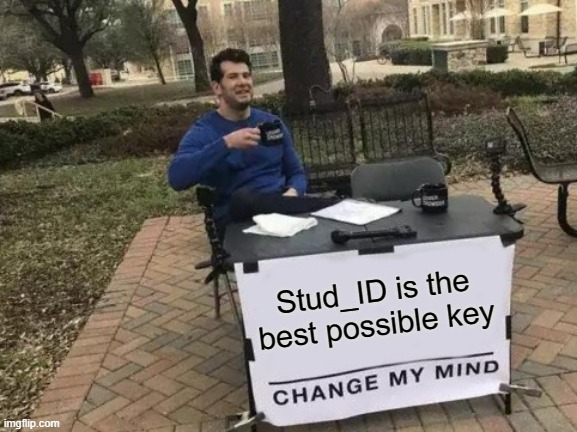

In [139]:
head(enrolments_clean_df, 0)
head(years_clean_df, 0)
head(courses_clean_df, 0)

Stud_ID,Degree_ID,Start_Year,Admission_Grade,Entry_Exam_Passed_Month,Start_Age,Sex,Father_Edu_Lev,Mother_Edu_Lev,ECTS_Student_Initial,Preference_Degree_Order


Stud_ID,Degree_ID,Academic_Year,Stud_Scholarship,Credits_Total,Credits_Passed_Total,Credits_Failed_Total,Credits_No_Show_Total,Credits_Normal_Reg_Total,Credits_Passed_Normal,Credits_Failed_Normal,Credits_No_Show_Normal


Stud_ID,Degree_ID,Course_ID,Academic_Year,Course_Section,ECTS,Is_Payment_Done,Final_Grade,Qualification_Note,Course_Type


### 5.1 - Merging enrolments with courses
    I would like to be able to merge the general data from enrolments to courses. 
    I want to be able to identify which student participated in which courses, when he/she started ect. 
    
    I will merge on Stud_ID
    
    I will use "Inner join" method, as I want to have the data for students, who appeares in both datasets

In [140]:
# See the data
head(enrolments_clean_df, 3)
head(courses_clean_df, 3)

Stud_ID,Degree_ID,Start_Year,Admission_Grade,Entry_Exam_Passed_Month,Start_Age,Sex,Father_Edu_Lev,Mother_Edu_Lev,ECTS_Student_Initial,Preference_Degree_Order
439444,156,2010,6.10,J,19,V,5,5,6,8
466072,156,2010,6.02,S,25,V,4,4,0,1
354734,156,2010,6.90,J,22,V,5,5,0,1


Stud_ID,Degree_ID,Course_ID,Academic_Year,Course_Section,ECTS,Is_Payment_Done,Final_Grade,Qualification_Note,Course_Type
12428,156,11553,2014,RE1,6.0,S,7.1,N,B
12428,156,11567,2014,RE1,4.5,S,8.1,N,O
12428,156,11572,2014,RE1,4.5,S,8.0,N,O


In [141]:
# merge two data frames by Stud_ID
enrolments_courses_df <- merge(enrolments_clean_df, courses_clean_df,by=c("Stud_ID"))
head(enrolments_courses_df)
nrow(enrolments_courses_df)

Stud_ID,Degree_ID.x,Start_Year,Admission_Grade,Entry_Exam_Passed_Month,Start_Age,Sex,Father_Edu_Lev,Mother_Edu_Lev,ECTS_Student_Initial,Preference_Degree_Order,Degree_ID.y,Course_ID,Academic_Year,Course_Section,ECTS,Is_Payment_Done,Final_Grade,Qualification_Note,Course_Type
7828,156,2010,6.2,J,30,M,4,3,60,1,156,11543,2010,I1H,6,S,7.4,N,S
7828,156,2010,6.2,J,30,M,4,3,60,1,156,11542,2010,I1H,6,S,8.3,N,S
7828,156,2010,6.2,J,30,M,4,3,60,1,156,11544,2010,I1H,6,S,7.6,N,S
7828,156,2010,6.2,J,30,M,4,3,60,1,156,11547,2010,I1H,6,S,6.5,A,S
7828,156,2010,6.2,J,30,M,4,3,60,1,156,11541,2010,I1H,6,S,7.7,N,S
18903,158,2010,6.5,J,36,V,3,5,48,2,158,11738,2010,1AT,6,S,7.0,N,S


[1] 185410

In [142]:
print("We have data about this manny students")
nrow(enrolments_clean_df)

print("We have data about this many differnet courses")
nrow(courses_clean_df)

print("If we take our left students and courses we will have this many information")
nrow(enrolments_courses_df)

[1] "We have data about this manny students"


[1] 8087

[1] "We have data about this many differnet courses"


[1] 187352

[1] "If we take our left students and courses we will have this many information"


[1] 185410

### 5.2 Merge the rest with YEARS

In [188]:
full_df <- merge(enrolments_courses_df, years_clean_df, by="Stud_ID")
full_df_save_copy <- full_df
head(full_df)

Stud_ID,Degree_ID.x,Start_Year,Admission_Grade,Entry_Exam_Passed_Month,Start_Age,Sex,Father_Edu_Lev,Mother_Edu_Lev,ECTS_Student_Initial,...,Academic_Year.y,Stud_Scholarship,Credits_Total,Credits_Passed_Total,Credits_Failed_Total,Credits_No_Show_Total,Credits_Normal_Reg_Total,Credits_Passed_Normal,Credits_Failed_Normal,Credits_No_Show_Normal
7828,156,2010,6.2,J,30,M,4,3,60,...,2010,-,30,30,0,0,30,30,0,0
7828,156,2010,6.2,J,30,M,4,3,60,...,2010,-,30,30,0,0,30,30,0,0
7828,156,2010,6.2,J,30,M,4,3,60,...,2010,-,30,30,0,0,30,30,0,0
7828,156,2010,6.2,J,30,M,4,3,60,...,2010,-,30,30,0,0,30,30,0,0
7828,156,2010,6.2,J,30,M,4,3,60,...,2010,-,30,30,0,0,30,30,0,0
18903,158,2010,6.5,J,36,V,3,5,48,...,2010,-,54,48,6,0,54,48,6,0


In [189]:
summary(full_df)

    Stud_ID        Degree_ID.x      Start_Year   Admission_Grade 
 Min.   :  7828   Min.   :156.0   Min.   :2010   Min.   : 5.000  
 1st Qu.:494511   1st Qu.:156.0   1st Qu.:2012   1st Qu.: 7.748  
 Median :529031   Median :156.0   Median :2014   Median : 9.466  
 Mean   :530751   Mean   :157.9   Mean   :2014   Mean   : 9.247  
 3rd Qu.:574314   3rd Qu.:158.0   3rd Qu.:2016   3rd Qu.:10.582  
 Max.   :689127   Max.   :189.0   Max.   :2020   Max.   :13.925  
                                                                 
 Entry_Exam_Passed_Month   Start_Age    Sex        Father_Edu_Lev 
 J:797252                Min.   :16.0   M:169488   Min.   :1.000  
 S:  6986                1st Qu.:18.0   V:634750   1st Qu.:3.000  
                         Median :18.0              Median :4.000  
                         Mean   :18.9              Mean   :4.033  
                         3rd Qu.:19.0              3rd Qu.:5.000  
                         Max.   :61.0              Max.   :6.000  
   

In [190]:
colnames(full_df)

[1] "Stud_ID"                  "Degree_ID.x"             
 [3] "Start_Year"               "Admission_Grade"         
 [5] "Entry_Exam_Passed_Month"  "Start_Age"               
 [7] "Sex"                      "Father_Edu_Lev"          
 [9] "Mother_Edu_Lev"           "ECTS_Student_Initial"    
[11] "Preference_Degree_Order"  "Degree_ID.y"             
[13] "Course_ID"                "Academic_Year.x"         
[15] "Course_Section"           "ECTS"                    
[17] "Is_Payment_Done"          "Final_Grade"             
[19] "Qualification_Note"       "Course_Type"             
[21] "Degree_ID"                "Academic_Year.y"         
[23] "Stud_Scholarship"         "Credits_Total"           
[25] "Credits_Passed_Total"     "Credits_Failed_Total"    
[27] "Credits_No_Show_Total"    "Credits_Normal_Reg_Total"
[29] "Credits_Passed_Normal"    "Credits_Failed_Normal"   
[31] "Credits_No_Show_Normal"

### 5.3 - Problems after merging
A few columns duplicated:
    
    Degree_ID.x and Degree_ID.y
    Academic_Year.x and Academic_Year.y

Let's find out, if the data they carry is the same (in other words, let's find out if we can remove them)

In [191]:
#Academic year
test_academic_year <- full_df[full_df$Academic_Year.x != full_df$Academic_Year.y, ]
nrow(test_academic_year) / nrow(full_df)

[1] 0.7692922

In [192]:
#Degree ID
test_Degree_ID <- full_df[full_df$Degree_ID.x != full_df$Degree_ID.y, ]
nrow(test_Degree_ID) / nrow(full_df)

[1] 0.08384956

### PROBLEM SPOTTED - THOSE COLUMS CARRY DIFFERENT INFORMATION
But are equally explained - before making analysis on those columns, we need to understand what do they mean?

<br>
<br>

#### In 77% values in Academic_Year columns are varying
#### In 8% values in Degree_ID  columns are varying

##### WHY?
#### WHY?
### WHY?
## WHY?
# WHY?

# SUGGESTED SOLLUTION TO THE PROBLEM FROM ABOVE
    HERE
    WE
    NEED
    TO
    PLACE
    SOME
    CODE
    TO 
    EXPLAIN
    OR 
    SOLVE
    THE
    ISSUE
    FROM 
    ABOVE

### TEMPORARY SOLLUTION - CHANGE THE NAMING OF THE COLUMNS

In [193]:
full_df <- full_df %>%
    rename(Degree_ID_Enrolments = Degree_ID.x,
           Degree_ID_Courses = Degree_ID.y,
           Academic_Year_Courses = Academic_Year.x,
           Academic_Year_Years = Academic_Year.x)
head(full_df)

Stud_ID,Degree_ID_Enrolments,Start_Year,Admission_Grade,Entry_Exam_Passed_Month,Start_Age,Sex,Father_Edu_Lev,Mother_Edu_Lev,ECTS_Student_Initial,...,Academic_Year.y,Stud_Scholarship,Credits_Total,Credits_Passed_Total,Credits_Failed_Total,Credits_No_Show_Total,Credits_Normal_Reg_Total,Credits_Passed_Normal,Credits_Failed_Normal,Credits_No_Show_Normal
7828,156,2010,6.2,J,30,M,4,3,60,...,2010,-,30,30,0,0,30,30,0,0
7828,156,2010,6.2,J,30,M,4,3,60,...,2010,-,30,30,0,0,30,30,0,0
7828,156,2010,6.2,J,30,M,4,3,60,...,2010,-,30,30,0,0,30,30,0,0
7828,156,2010,6.2,J,30,M,4,3,60,...,2010,-,30,30,0,0,30,30,0,0
7828,156,2010,6.2,J,30,M,4,3,60,...,2010,-,30,30,0,0,30,30,0,0
18903,158,2010,6.5,J,36,V,3,5,48,...,2010,-,54,48,6,0,54,48,6,0


##### So it happened, we merged all the tables into one, big table with all the informations that we have.  But can we make it even nicer?

## 6 - Data cleaning - transormation/selection/reduction

Before starting our analysis and doing some intresting charts, we should verify, if our data is in the best possible state as it could be. There are some operations which may be performed on the dataset and make it better.


<br>
<br>
<br>
<br>


In this chapter we are going to try to perform some steps, which will make the anaylsis easier and more clear. Possible steps are:

    - discretisation: We have data in a range from 0 to 10. We replace them with values: low, medium, height. 

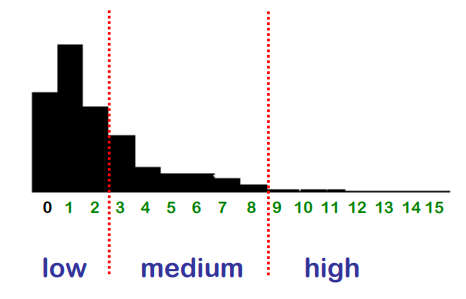
        
    
    - numerisation: Having values like small, medium, large, giant we replace them with numbers from 1 to 4
    
    - normalization: Having the data in range from 0 to 200 (for example) we map the data to the range between 0 and 1. Some machine learning algorithms may prefer this type of data
    
    
    - attribute reduction: After joing the tables it may appear, that some columns are redundant or they are practicaly the same. In such case we want to drop those columns
    
    
    - attribute creation: Joing information from some columns, may create a usefull, new column. For example: Having Height and weight we could calculate the BMI of a person. We can create also some new parameters which may be usefull for us: population/area.

In [194]:
# make a data row copy to recall it later
full_df_copy <- full_df

### 6.1 Data discretisation

#### Admission_Grade 

[1] 6.2 6.2 6.2 6.2 6.2 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5
[20] 6.5

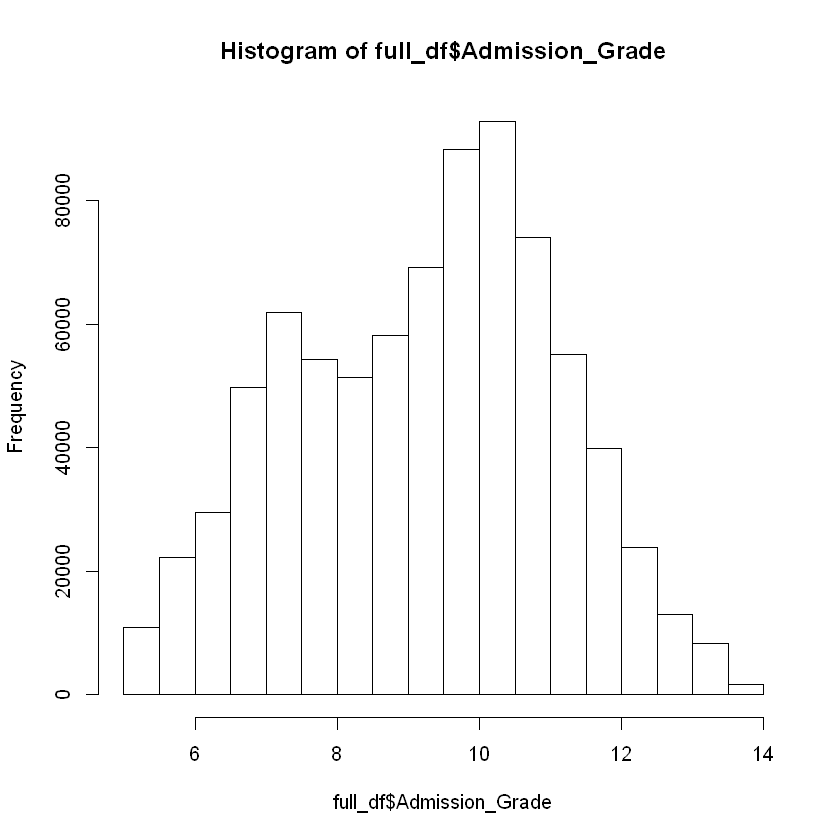

In [195]:
# Plot the histogram of 
hist(full_df$Admission_Grade)
head(full_df$Admission_Grade, 20)

Stud_ID,Degree_ID_Enrolments,Start_Year,Admission_Grade,Entry_Exam_Passed_Month,Start_Age,Sex,Father_Edu_Lev,Mother_Edu_Lev,ECTS_Student_Initial,...,Academic_Year.y,Stud_Scholarship,Credits_Total,Credits_Passed_Total,Credits_Failed_Total,Credits_No_Show_Total,Credits_Normal_Reg_Total,Credits_Passed_Normal,Credits_Failed_Normal,Credits_No_Show_Normal
7828,156,2010,"[5.89,6.79)",J,30,M,4,3,60,...,2010,-,30,30,0,0,30,30,0,0
7828,156,2010,"[5.89,6.79)",J,30,M,4,3,60,...,2010,-,30,30,0,0,30,30,0,0
7828,156,2010,"[5.89,6.79)",J,30,M,4,3,60,...,2010,-,30,30,0,0,30,30,0,0
7828,156,2010,"[5.89,6.79)",J,30,M,4,3,60,...,2010,-,30,30,0,0,30,30,0,0
7828,156,2010,"[5.89,6.79)",J,30,M,4,3,60,...,2010,-,30,30,0,0,30,30,0,0
18903,158,2010,"[5.89,6.79)",J,36,V,3,5,48,...,2010,-,54,48,6,0,54,48,6,0


'data.frame':	804238 obs. of  31 variables:
 $ Stud_ID                 : int  7828 7828 7828 7828 7828 18903 18903 18903 18903 18903 ...
 $ Degree_ID_Enrolments    : int  156 156 156 156 156 158 158 158 158 158 ...
 $ Start_Year              : int  2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 ...
 $ Admission_Grade         : Factor w/ 10 levels "[5,5.89)","[5.89,6.79)",..: 2 2 2 2 2 2 2 2 2 2 ...
  ..- attr(*, "discretized:breaks")= num  5 5.89 6.79 7.68 8.57 ...
  ..- attr(*, "discretized:method")= chr "interval"
 $ Entry_Exam_Passed_Month : Factor w/ 2 levels "J","S": 1 1 1 1 1 1 1 1 1 1 ...
 $ Start_Age               : int  30 30 30 30 30 36 36 36 36 36 ...
 $ Sex                     : Factor w/ 2 levels "M","V": 1 1 1 1 1 2 2 2 2 2 ...
 $ Father_Edu_Lev          : int  4 4 4 4 4 3 3 3 3 3 ...
 $ Mother_Edu_Lev          : int  3 3 3 3 3 5 5 5 5 5 ...
 $ ECTS_Student_Initial    : num  60 60 60 60 60 48 48 48 48 48 ...
 $ Preference_Degree_Order : int  1 1 1 1 1 2 2 2 2 2 ...
 $ 

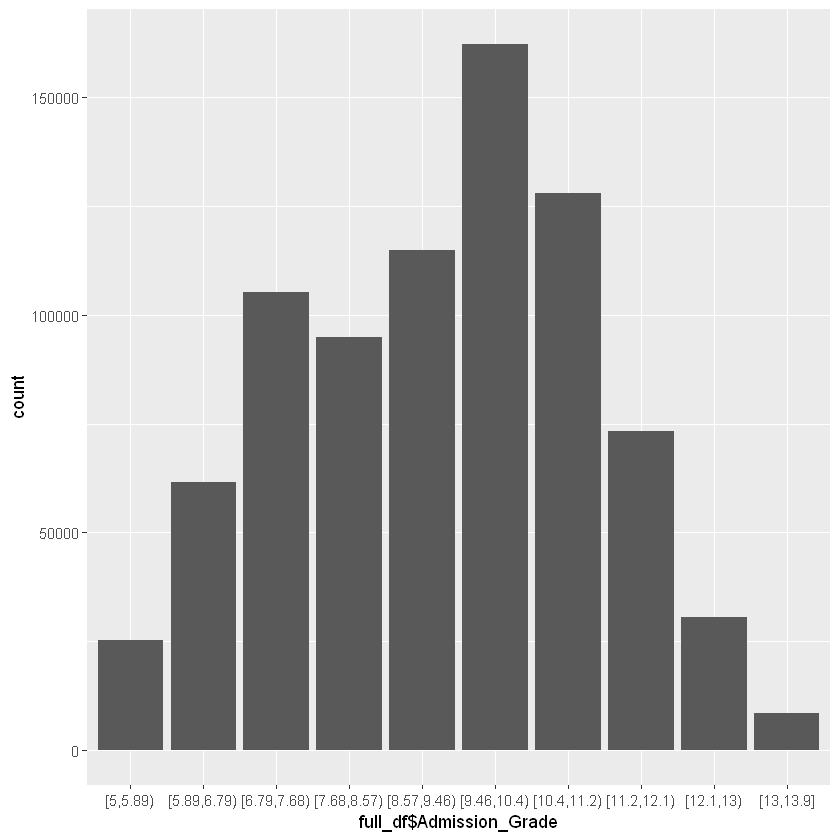

In [208]:
# Here we change Admission_Grade from numeric into a factor of 10 variables
full_df <- full_df_copy
full_df$Admission_Grade <- discretize(
    x=full_df$Admission_Grade,
    breaks = 10,
    method="interval"
)
head(full_df)
str(full_df)
ggplot(full_df, aes(x=full_df$Admission_Grade)) +
    geom_bar()

# now we have Admission Grade expressed as "ranges of values"
# in the str below, you can see that variable is expressed as: Factor w/ 10 levels

#### Some second variable

In [210]:
head(full_df)
str(full_df)

Stud_ID,Degree_ID_Enrolments,Start_Year,Admission_Grade,Entry_Exam_Passed_Month,Start_Age,Sex,Father_Edu_Lev,Mother_Edu_Lev,ECTS_Student_Initial,...,Academic_Year.y,Stud_Scholarship,Credits_Total,Credits_Passed_Total,Credits_Failed_Total,Credits_No_Show_Total,Credits_Normal_Reg_Total,Credits_Passed_Normal,Credits_Failed_Normal,Credits_No_Show_Normal
7828,156,2010,"[5.89,6.79)",J,30,M,4,3,60,...,2010,-,30,30,0,0,30,30,0,0
7828,156,2010,"[5.89,6.79)",J,30,M,4,3,60,...,2010,-,30,30,0,0,30,30,0,0
7828,156,2010,"[5.89,6.79)",J,30,M,4,3,60,...,2010,-,30,30,0,0,30,30,0,0
7828,156,2010,"[5.89,6.79)",J,30,M,4,3,60,...,2010,-,30,30,0,0,30,30,0,0
7828,156,2010,"[5.89,6.79)",J,30,M,4,3,60,...,2010,-,30,30,0,0,30,30,0,0
18903,158,2010,"[5.89,6.79)",J,36,V,3,5,48,...,2010,-,54,48,6,0,54,48,6,0


'data.frame':	804238 obs. of  31 variables:
 $ Stud_ID                 : int  7828 7828 7828 7828 7828 18903 18903 18903 18903 18903 ...
 $ Degree_ID_Enrolments    : int  156 156 156 156 156 158 158 158 158 158 ...
 $ Start_Year              : int  2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 ...
 $ Admission_Grade         : Factor w/ 10 levels "[5,5.89)","[5.89,6.79)",..: 2 2 2 2 2 2 2 2 2 2 ...
  ..- attr(*, "discretized:breaks")= num  5 5.89 6.79 7.68 8.57 ...
  ..- attr(*, "discretized:method")= chr "interval"
 $ Entry_Exam_Passed_Month : Factor w/ 2 levels "J","S": 1 1 1 1 1 1 1 1 1 1 ...
 $ Start_Age               : int  30 30 30 30 30 36 36 36 36 36 ...
 $ Sex                     : Factor w/ 2 levels "M","V": 1 1 1 1 1 2 2 2 2 2 ...
 $ Father_Edu_Lev          : int  4 4 4 4 4 3 3 3 3 3 ...
 $ Mother_Edu_Lev          : int  3 3 3 3 3 5 5 5 5 5 ...
 $ ECTS_Student_Initial    : num  60 60 60 60 60 48 48 48 48 48 ...
 $ Preference_Degree_Order : int  1 1 1 1 1 2 2 2 2 2 ...
 $ 

### Adams idea
There are some variables, which are expressed as numerical, but their range is very narrow. See:

Preference_Degree_Order 

Academic_Year_Years     

Final_Grade             

You can try to discrtize some of those variables :)



### For some other tasks from this chapter

- numerisation: I think it does not apply to our data

- normalization: I think it does not apply to our data


- attribute reduction: There are some columns which are redundant.
You can do it on your own eyes, but it would be also a good idea to make a scatter plot in order to see if some other variables are reduntant as well
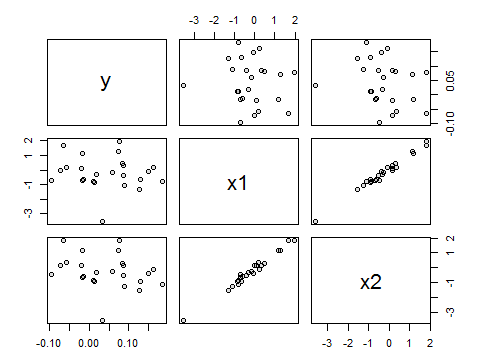

Like here - X1 with X2
Source (complicated): https://stats.stackexchange.com/questions/372403/redundant-variables-in-linear-regression

- attribute creation: I don't know. Maybe we can, but do we need more arguments??

# FEEL FREE TO DO SOME PLOTS, ANALYSIS ON YOUR OWN ECT :) 

_____________________________________________
# Data correlation
Using the very basing method, lets find out which variables depends on which variables

In [153]:
head(full_df)

Stud_ID,Degree_ID_Enrolments,Start_Year,Admission_Grade,Entry_Exam_Passed_Month,Start_Age,Sex,Father_Edu_Lev,Mother_Edu_Lev,ECTS_Student_Initial,...,Academic_Year.y,Stud_Scholarship,Credits_Total,Credits_Passed_Total,Credits_Failed_Total,Credits_No_Show_Total,Credits_Normal_Reg_Total,Credits_Passed_Normal,Credits_Failed_Normal,Credits_No_Show_Normal
7828,156,2010,NA,J,30,M,4,3,60,...,2010,-,30,30,0,0,30,30,0,0
7828,156,2010,NA,J,30,M,4,3,60,...,2010,-,30,30,0,0,30,30,0,0
7828,156,2010,NA,J,30,M,4,3,60,...,2010,-,30,30,0,0,30,30,0,0
7828,156,2010,NA,J,30,M,4,3,60,...,2010,-,30,30,0,0,30,30,0,0
7828,156,2010,NA,J,30,M,4,3,60,...,2010,-,30,30,0,0,30,30,0,0
18903,158,2010,NA,J,36,V,3,5,48,...,2010,-,54,48,6,0,54,48,6,0


In [154]:
full_df

Stud_ID,Degree_ID_Enrolments,Start_Year,Admission_Grade,Entry_Exam_Passed_Month,Start_Age,Sex,Father_Edu_Lev,Mother_Edu_Lev,ECTS_Student_Initial,...,Academic_Year.y,Stud_Scholarship,Credits_Total,Credits_Passed_Total,Credits_Failed_Total,Credits_No_Show_Total,Credits_Normal_Reg_Total,Credits_Passed_Normal,Credits_Failed_Normal,Credits_No_Show_Normal
7828,156,2010,NA,J,30,M,4,3,60.0,...,2010,-,30.0,30.0,0,0,30.0,30.0,0,0
7828,156,2010,NA,J,30,M,4,3,60.0,...,2010,-,30.0,30.0,0,0,30.0,30.0,0,0
7828,156,2010,NA,J,30,M,4,3,60.0,...,2010,-,30.0,30.0,0,0,30.0,30.0,0,0
7828,156,2010,NA,J,30,M,4,3,60.0,...,2010,-,30.0,30.0,0,0,30.0,30.0,0,0
7828,156,2010,NA,J,30,M,4,3,60.0,...,2010,-,30.0,30.0,0,0,30.0,30.0,0,0
18903,158,2010,NA,J,36,V,3,5,48.0,...,2010,-,54.0,48.0,6,0,54.0,48.0,6,0
18903,158,2010,NA,J,36,V,3,5,48.0,...,2011,-,34.5,10.5,12,12,34.5,10.5,12,12
18903,158,2010,NA,J,36,V,3,5,48.0,...,2010,-,54.0,48.0,6,0,54.0,48.0,6,0
18903,158,2010,NA,J,36,V,3,5,48.0,...,2011,-,34.5,10.5,12,12,34.5,10.5,12,12
18903,158,2010,NA,J,36,V,3,5,48.0,...,2010,-,54.0,48.0,6,0,54.0,48.0,6,0


In [155]:
summary(full_df)

    Stud_ID       Degree_ID_Enrolments   Start_Year   Admission_Grade 
 Min.   :  7828   Min.   :156.0        Min.   :2010   Min.   : NA     
 1st Qu.:494511   1st Qu.:156.0        1st Qu.:2012   1st Qu.: NA     
 Median :529031   Median :156.0        Median :2014   Median : NA     
 Mean   :530751   Mean   :157.9        Mean   :2014   Mean   :NaN     
 3rd Qu.:574314   3rd Qu.:158.0        3rd Qu.:2016   3rd Qu.: NA     
 Max.   :689127   Max.   :189.0        Max.   :2020   Max.   : NA     
                                                      NA's   :804238  
 Entry_Exam_Passed_Month   Start_Age    Sex        Father_Edu_Lev 
 J:797252                Min.   :16.0   M:169488   Min.   :1.000  
 S:  6986                1st Qu.:18.0   V:634750   1st Qu.:3.000  
                         Median :18.0              Median :4.000  
                         Mean   :18.9              Mean   :4.033  
                         3rd Qu.:19.0              3rd Qu.:5.000  
                         Max. 

In [156]:
colnames(full_df)

[1] "Stud_ID"                  "Degree_ID_Enrolments"    
 [3] "Start_Year"               "Admission_Grade"         
 [5] "Entry_Exam_Passed_Month"  "Start_Age"               
 [7] "Sex"                      "Father_Edu_Lev"          
 [9] "Mother_Edu_Lev"           "ECTS_Student_Initial"    
[11] "Preference_Degree_Order"  "Degree_ID_Courses"       
[13] "Course_ID"                "Academic_Year_Years"     
[15] "Course_Section"           "ECTS"                    
[17] "Is_Payment_Done"          "Final_Grade"             
[19] "Qualification_Note"       "Course_Type"             
[21] "Degree_ID"                "Academic_Year.y"         
[23] "Stud_Scholarship"         "Credits_Total"           
[25] "Credits_Passed_Total"     "Credits_Failed_Total"    
[27] "Credits_No_Show_Total"    "Credits_Normal_Reg_Total"
[29] "Credits_Passed_Normal"    "Credits_Failed_Normal"   
[31] "Credits_No_Show_Normal"

# THATS ALL WHAT IS OFFICAL, EVERYTHING BELOW IS MY TRIALAS

______________________________________________________
# Clustering of the students

In [ ]:
# loading the cluster package
library(cluster)
head(enrolments_df_clean)

# Select one degree - try to claster this for students according to different features of different courses.
cluster_data <- 


In [ ]:
# porównam poziom wykształcenia rodziców vs wiek rozpoczęcia studiów
# porównam poziom wykształcenia rodziców vs admission_grade



In [ ]:
summary(enrolments_df_clean)

In [ ]:
# VIM library for using 'aggr'
library(VIM)

# 'aggr' plots the amount of missing/imputed values in each column
aggr(enrolments_df_clean)

In [ ]:
clustering_df <- select(enrolments_df_clean, Admission_Grade, Father_Edu_Lev, Mother_Edu_Lev)

In [ ]:
head(clustering_df)

In [ ]:
clusters <- kmeans(clustering_df[2:3], 4, nstart = 25)


In [ ]:
str(clusters)

In [ ]:
library(ggplot2)
clustering_df$cluster <- as.character(clusters$cluster)
head(clustering_df)

In [ ]:
ggplot() +
    geom_point(data = clustering_df,
              mapping = aes(x = Admission_Grade, y = Father_Edu_Lev,
               colour = cluster))

In [ ]:
clustering_df_2 <- select(enrolments_df_clean, Stud_ID, Admission_Grade, CRE_RECON_INI, Degree_ID, Sex, Start_Year )
head(clustering_df_2)

In [ ]:
ggplot() +
    geom_point(data = clustering_df_2,
              mapping = aes(x = Start_Year, y = Stud_ID ))

In [ ]:
str(clustering_df_2)